In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import talib as tb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

In [47]:
ticker = 'TCS'
print(ticker)
ticker = ticker + '.NS'
a1 = yf.Ticker(ticker)
df1 = a1.history(ticker , start="2014-01-01", end="2017-12-31")

position = 0
pos_index = 0
trades = 0
target = 1
stoploss = 0.5
pnl_1 = []
realised_pl = 0
position_1 = []
tradebook = {}

df1['slowk'],df1['slowd'] = tb.STOCH(df1.High,df1.Low,df1.Close)
df1['slow diff'] = df1['slowk'] - df1['slowd']
df1['RSI'] = tb.RSI(df1['Close'])

df = df1.dropna()

for i in range(len(df)):          

    if ((position == 0) & (df['RSI'].loc[df.index[i]] < 35) & (df['slowk'].loc[df.index[i]] < 25) & (df['slowd'].loc[df.index[i]] < 25) &
        (df['slow diff'].loc[df.index[i]] > 0)):
            position_time = df.index[i].time()
            pos_index = df.index[i]
            entry_price = df.loc[df.index[i+1],'Open']
            position = 1
            position_1.append(pos_index)
            print('long position at {}'.format(df.index[i]))
            trades = trades + 1
            continue
    if ((position == 0) & (df['RSI'].loc[df.index[i]] > 65) & (df['slowk'].loc[df.index[i]] > 75) & (df['slowd'].loc[df.index[i]] > 75) &
        (df['slow diff'].loc[df.index[i]] < 0)):
            position_time = df.index[i].time()
            pos_index = df.index[i]
            entry_price = df.loc[df.index[i+1],'Open']
            position = -1
            position_1.append(pos_index)
            print('short position at {}'.format(df.index[i]))
            trades = trades+1
            continue
            
    if (pos_index!=0):
        pnl = ((df.loc[df.index[i],'Close']- entry_price)/entry_price)*(position)*100 
        
        
    if ((position != 0) and ((pnl  >target) or (pnl < -stoploss))):
        realised_pl = realised_pl + pnl
        pnl_1.append(pnl)
        position = 0
        print('position exited at {}'.format(df.index[i].time()))
        pos_index = 0
        tradebook[trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :df.index[i], 'pnl' :pnl}
        print(pnl)
    elif ((position != 0) and (df.index[i].time() == dt.time(0,0))):
        realised_pl = realised_pl + pnl
        pnl_1.append(pnl)
        tradebook[trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :df.index[i], 'pnl' :pnl}
        position = 0
        print('position covered at {}'.format(df.index[i].time()))
        pos_index = 0
        print(pnl)
        pnl = 0
print("Net pl =",realised_pl,'%')

TCS
short position at 2014-06-16 00:00:00
position covered at 00:00:00
0.22100769851317656
short position at 2014-07-02 00:00:00
position exited at 00:00:00
-0.7878241910691944
short position at 2014-07-28 00:00:00
position covered at 00:00:00
-0.3965490485288067
short position at 2014-07-31 00:00:00
position exited at 00:00:00
2.275731947815543
long position at 2014-12-12 00:00:00
position exited at 00:00:00
-1.1006751257863168
short position at 2015-02-23 00:00:00
position covered at 00:00:00
-0.3990348923533736
short position at 2015-08-14 00:00:00
position covered at 00:00:00
0.19888098814283967
long position at 2015-11-17 00:00:00
position exited at 00:00:00
-1.5676651472559855
long position at 2015-11-19 00:00:00
position exited at 00:00:00
1.345873554035497
long position at 2016-02-29 00:00:00
position exited at 00:00:00
3.8144050316347498
short position at 2016-03-28 00:00:00
position covered at 00:00:00
0.3470580167978098
short position at 2016-08-01 00:00:00
position covered 

In [20]:
tradebook_df = pd.DataFrame(tradebook).T
tradebook_df['Profit/Loss'] = (tradebook_df['entry_price']*tradebook_df['pnl'])/100
tradebook_df

,entry_time,entry_price,long_short,exit_time,pnl,Profit/Loss
1,00:00:00,990.366,-1,2014-06-17,0.221008,2.18878
2,00:00:00,1039.82,0,2014-07-03,-0.787824,-8.19196
3,00:00:00,1137.82,-1,2014-07-30,-0.396549,-4.51202
4,00:00:00,1133.51,0,2014-08-01,2.27573,25.7956
5,00:00:00,1051.95,0,2014-12-15,-1.10068,-11.5785
6,00:00:00,1190.67,-1,2015-02-24,-0.399035,-4.75117
7,00:00:00,1202.57,-1,2015-08-17,0.198881,2.39169
8,00:00:00,1074.93,0,2015-11-18,-1.56767,-16.8513
9,00:00:00,1064.85,0,2015-11-20,1.34587,14.3316
10,00:00:00,989.169,0,2016-03-01,3.81441,37.7309


In [46]:
cagr = (float(tradebook_df['entry_price'].iloc[-1])/float(tradebook_df['entry_price'].iloc[0]))**(1/4) - 1
print("CAGR =",cagr)
print("CAGR (%) =",cagr*100,'%')

CAGR = 0.06784975602109755
CAGR (%) = 6.784975602109755 %


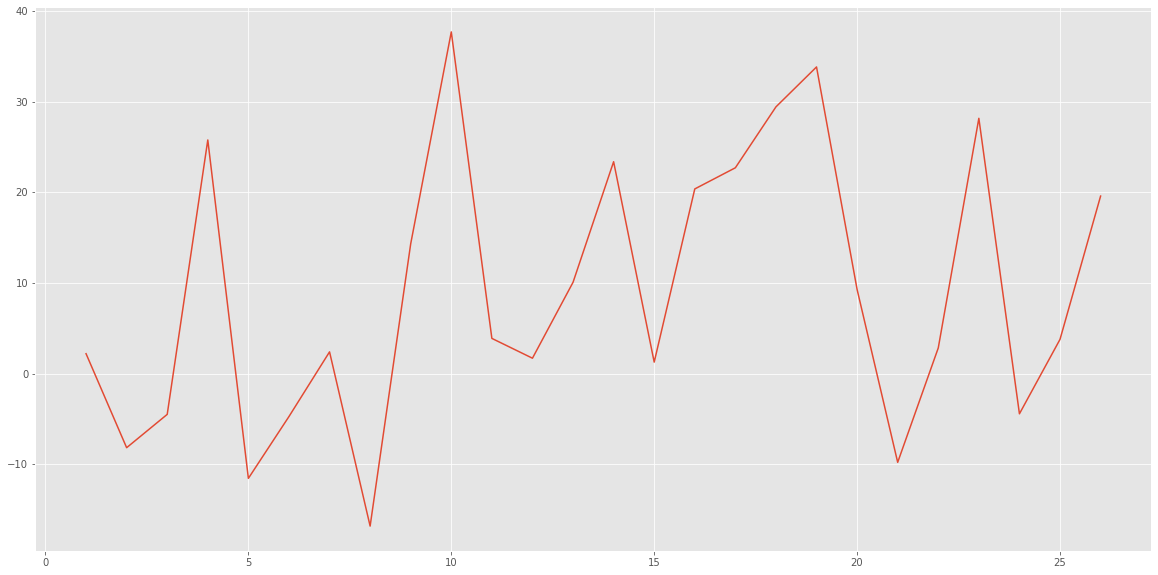

In [91]:
plt.plot(tradebook_df['Profit/Loss'])